In [21]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 10 10:43:19 2020
conda install pydot graphviz
@author: ASUS
"""

'\nCreated on Wed Jun 10 10:43:19 2020\nconda install pydot graphviz\n@author: ASUS\n'

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# In[0]: show the figure

from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from pydot import graph_from_dot_data
from IPython.display import display, Image 

In [52]:
def show_DTree(decision_tree, attributes, file_name='dt'):
    dot_data = StringIO()
    export_graphviz(decision_tree, out_file = dot_data, feature_names = attributes)
    (graph, ) = graph_from_dot_data(dot_data.getvalue())
    img = Image(graph.create_png(), width=550, height=400) # show the image
    display(img)

    path = 'Results/'+file_name+'.png'
    with open(path, "wb") as png:
        png.write(graph.create_png())

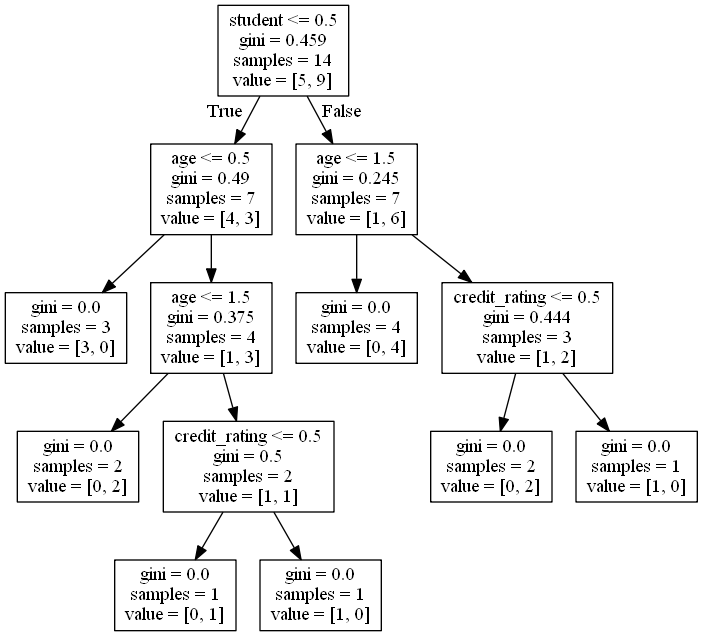

No chance!


In [53]:
# In[1]A: demo case
# Given an example: X with four features

X = [[0, 2, 0, 0], [0, 2, 0, 1], [1, 2, 0, 0], [2, 1, 0, 0], [2, 0, 1, 0], 
     [2, 0, 1, 1], [1, 0, 1, 1], [0, 1, 0, 0], [0, 0, 1, 0], [2, 1, 1, 0], 
     [0, 1, 1, 1], [1, 1, 0, 1], [1, 2, 1, 0], [2, 1, 0, 1]]
Y = [0,0,1,1,1, 0,1,0,1,1, 1,1,1,0]
attr = ['age', 'income', 'student', 'credit_rating']

''' 
DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                       random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                       min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
'''
dt = DecisionTreeClassifier()
dt.fit(X, Y)

show_DTree(decision_tree = dt, attributes = attr, file_name='BuyComputer')
wantPredict = dt.predict([[0,2, 0,0]]) 
if wantPredict == [1]:
    print('Could buy!')
elif wantPredict == [0]:
    print('No chance!')

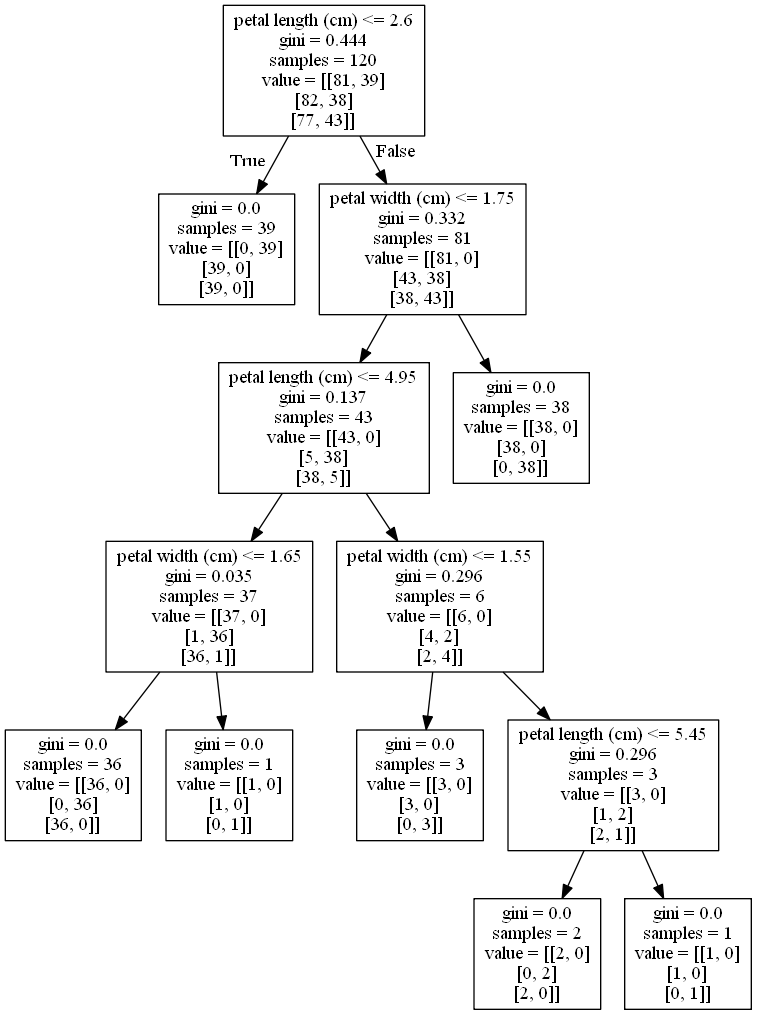

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        12
           2       0.88      1.00      0.93         7

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30
 samples avg       0.97      0.97      0.97        30



In [54]:
# In[1]B: load iris file
from sklearn.datasets import load_iris
iris = load_iris()
attr = iris.feature_names
X = pd.DataFrame(iris.data, columns=attr)
y = pd.Categorical.from_codes(iris.target, iris.target_names)
X.head()
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
dt = DecisionTreeClassifier(max_depth=None) # specify the maximum depth 
dt.fit(X_train, y_train)

show_DTree(decision_tree = dt, attributes = attr, file_name='iris')

y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

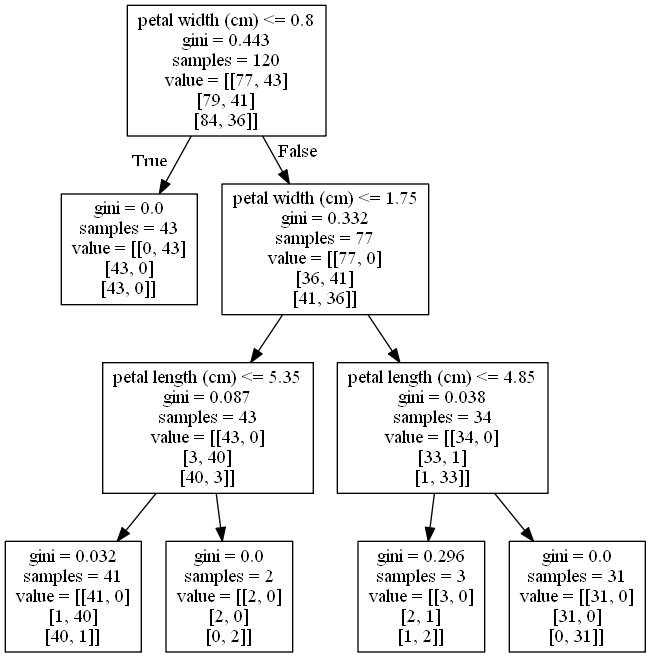

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.82      1.00      0.90         9
           2       1.00      0.86      0.92        14

   micro avg       0.93      0.93      0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30
 samples avg       0.93      0.93      0.93        30



In [55]:
# In[1]B: load iris file
from sklearn.datasets import load_iris
iris = load_iris()
attr = iris.feature_names
X = pd.DataFrame(iris.data, columns=attr)
y = pd.Categorical.from_codes(iris.target, iris.target_names)
X.head()
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
dt = DecisionTreeClassifier(max_depth=3) # specify the maximum depth 
dt.fit(X_train, y_train)

show_DTree(decision_tree = dt, attributes = attr, file_name='iris')

y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))